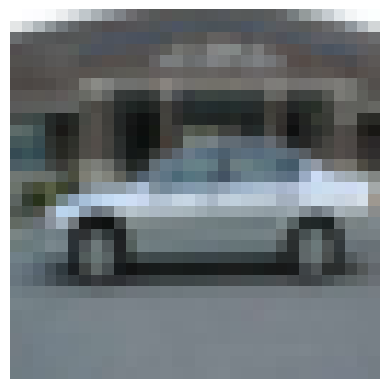

In [33]:
import keras
from keras import layers
from keras.datasets import cifar10
import matplotlib.pyplot as plt
from PIL import Image
import random

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

fig, ax = plt.subplots(1,1)
n = random.randrange(50000)
plt.axis('off')
plt.imshow(x_train[n])
plt.show()

50000


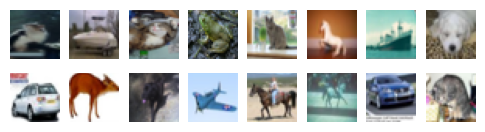

In [20]:
import keras
from keras import layers
from keras.datasets import cifar10
import matplotlib.pyplot as plt
from PIL import Image
import random

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

print(len(x_train))

fig, ax = plt.subplots(2, 8, figsize=(6,1.5))

for i in range(16):
	# define subplot
	plt.subplot(2, 8, 1 + i)
	# turn off axis
	plt.axis('off')
	# plot raw pixel data
	n = random.randrange(50000)
	plt.imshow(x_train[n])
plt.show()

(32, 32, 3)


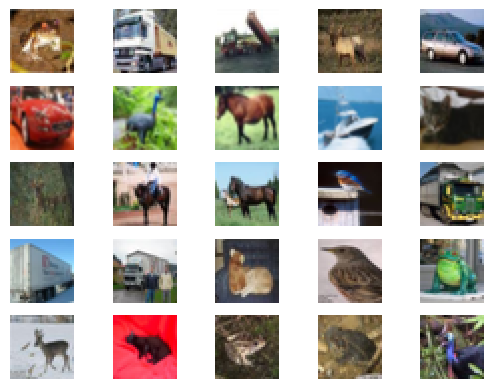

In [1]:
import keras
from keras import layers
from keras.datasets import cifar10
import matplotlib.pyplot as plt
from PIL import Image

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

foto = x_train[123]
im = Image.fromarray(foto)
im.save('prueba.jpg')

print(foto.shape)

for i in range(25):
	# define subplot
	plt.subplot(5, 5, 1 + i)
	# turn off axis
	plt.axis('off')
	# plot raw pixel data
	plt.imshow(x_train[i])
plt.show()

#plt.figure(figsize = (2,2))
#plt.imshow(foto)
#plt.show()

In [2]:
from keras.layers import Input, Dense, Conv2D, Conv2DTranspose, LeakyReLU, Dropout, Flatten
from keras.optimizers import Adam

def create_discriminator(input_shape):

    inputs = Input(shape=input_shape)
    x = Conv2D(filters=64, kernel_size=(3, 3), padding='same')(inputs)
    x = LeakyReLU(alpha=0.2)(x)
    x = Conv2D(filters=128, kernel_size=(3, 3), strides=(2, 2), padding='same')(x)
    x = LeakyReLU(alpha=0.2)(x)
    x = Conv2D(filters=128, kernel_size=(3, 3), strides=(2, 2), padding='same')(x)
    x = LeakyReLU(alpha=0.2)(x)
    x = Conv2D(filters=256, kernel_size=(3, 3), strides=(2, 2), padding='same')(x)
    x = LeakyReLU(alpha=0.2)(x)
    x = Flatten()(x)
    x = Dropout(0.4)(x)
    outputs = Dense(units=1, activation='sigmoid')(x)

    model = keras.Model(inputs=inputs, outputs=outputs, name="discriminator_model")

    # compile model
    opt = Adam(lr=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

Model: "discriminator_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 16, 16, 128)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         147584    
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 8, 8, 128) 

C:\Users\Sara Vicente Arroyo\AppData\Roaming\Python\Python39\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


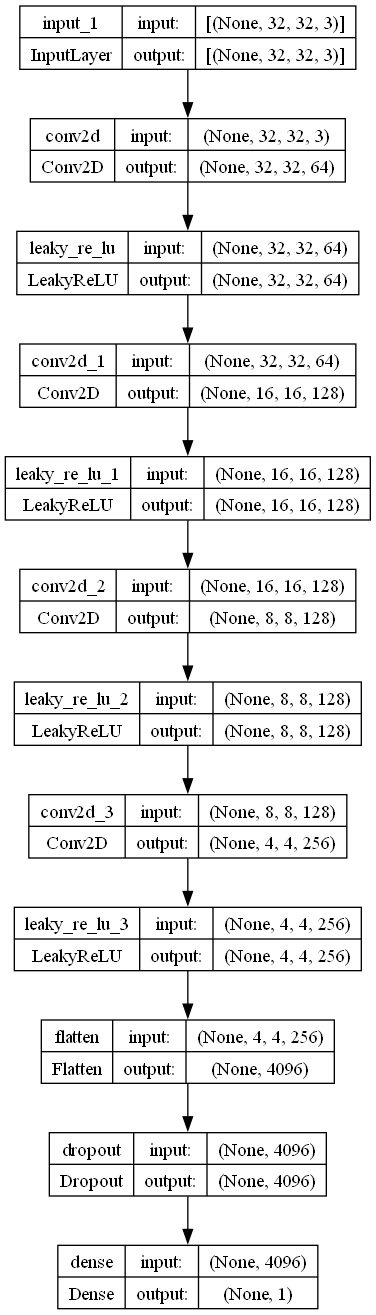

In [3]:
# define model
model = create_discriminator((32, 32, 3))
# summarize the model
model.summary()
# plot the model
keras.utils.vis_utils.plot_model(model, to_file='discriminator_plot.png', show_shapes=True, show_layer_names=True)

In [4]:
# convert from unsigned ints to floats
X = x_train.astype('float32')
# scale from [0,255] to [-1,1]
X = (X - 127.5) / 127.5
dataset = X

In [5]:
import numpy as np
import numpy.random
# select real samples
def generate_real_samples(dataset, n_samples):
    # choose random instances
    ix = numpy.random.randint(0, dataset.shape[0], n_samples)
    # retrieve selected images
    X = dataset[ix]
    # generate 'real' class labels (1)
    y = np.ones((n_samples, 1))
    return X, y

In [6]:
# generate n fake samples with class labels
def generate_fake_samples(n_samples):
 # generate uniform random numbers in [0,1]
 X = numpy.random.rand(32 * 32 * 3 * n_samples)
 # update to have the range [-1, 1]
 X = -1 + X * 2
 # reshape into a batch of color images
 X = X.reshape((n_samples, 32, 32, 3))
 # generate 'fake' class labels (0)
 y = np.zeros((n_samples, 1))
 return X, y

In [7]:
def train_discriminator(model, dataset, n_iter=20, n_batch=128):
 half_batch = int(n_batch / 2)
 # manually enumerate epochs
 for i in range(n_iter):
 # get randomly selected 'real' samples
    X_real, y_real = generate_real_samples(dataset, half_batch)
    # update discriminator on real samples
    _, real_acc = model.train_on_batch(X_real, y_real)
    # generate 'fake' examples
    X_fake, y_fake = generate_fake_samples(half_batch)
    # update discriminator on fake samples
    _, fake_acc = model.train_on_batch(X_fake, y_fake)
    # summarize performance
    print('>%d real=%.0f%% fake=%.0f%%' % (i+1, real_acc*100, fake_acc*100))

In [8]:
# define the discriminator model
model = create_discriminator((32,32,3))
# load image data
train_discriminator(model, dataset)

>1 real=33% fake=0%
>2 real=95% fake=11%
>3 real=97% fake=56%
>4 real=89% fake=77%
>5 real=89% fake=97%
>6 real=88% fake=100%
>7 real=84% fake=100%
>8 real=89% fake=100%
>9 real=89% fake=100%
>10 real=92% fake=100%
>11 real=94% fake=100%
>12 real=95% fake=100%
>13 real=97% fake=100%
>14 real=97% fake=100%
>15 real=100% fake=100%
>16 real=97% fake=100%
>17 real=98% fake=100%
>18 real=100% fake=100%
>19 real=100% fake=100%
>20 real=100% fake=100%


In [15]:
from keras.layers import Reshape
from keras import Model

def create_generator(latent_dim):

    inputs = Input(shape=latent_dim)
    # foundation for 4x4 image
    n_nodes = 256 * 4 * 4
    x = Dense(n_nodes)(inputs)
    x = LeakyReLU(alpha=0.2)(x)
    x = Reshape((4, 4, 256))(x)
    # upsample to 8x8
    x = Conv2DTranspose(filters=128, kernel_size=(4,4), strides=(2,2), padding='same')(x)
    x = LeakyReLU(alpha=0.2)(x)
    # upsample to 16x16
    x = Conv2DTranspose(filters=128, kernel_size=(4,4), strides=(2,2), padding='same')(x)
    x = LeakyReLU(alpha=0.2)(x)
    # upsample to 32x32
    x = Conv2DTranspose(filters=128, kernel_size=(4,4), strides=(2,2), padding='same')(x)
    x = LeakyReLU(alpha=0.2)(x)
    # output layer
    outputs = Conv2D(filters=3, kernel_size=(3,3), activation='tanh', padding='same')(x)

    model = Model(inputs=inputs, outputs=outputs, name="generator_model")
    return model

Model: "generator_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 100)]             0         
                                                                 
 dense_6 (Dense)             (None, 4096)              413696    
                                                                 
 leaky_re_lu_18 (LeakyReLU)  (None, 4096)              0         
                                                                 
 reshape_4 (Reshape)         (None, 4, 4, 256)         0         
                                                                 
 conv2d_transpose_8 (Conv2DT  (None, 8, 8, 128)        524416    
 ranspose)                                                       
                                                                 
 leaky_re_lu_19 (LeakyReLU)  (None, 8, 8, 128)         0         
                                                   

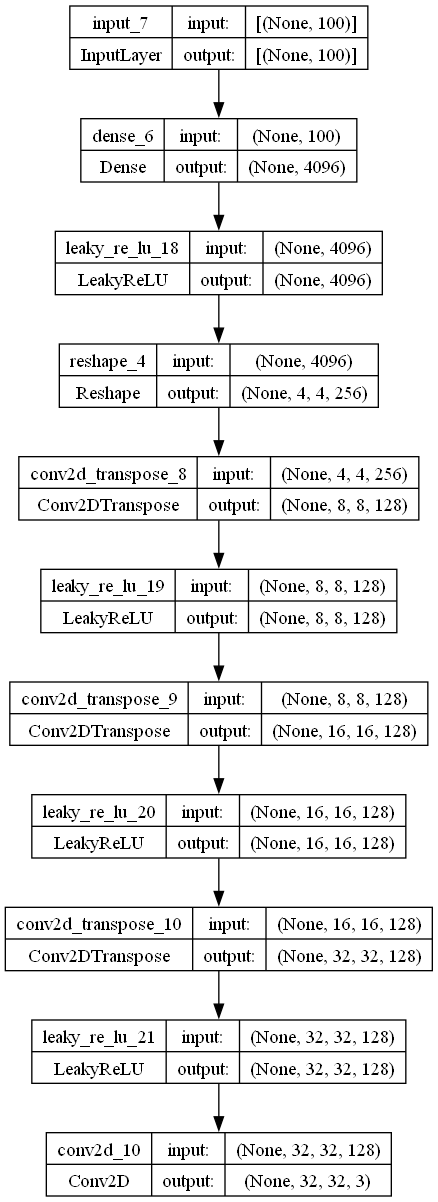

In [16]:
# define the size of the latent space
latent_dim = 100
# define the generator model
model = create_generator(latent_dim)
# summarize the model
model.summary()
# plot the model
keras.utils.vis_utils.plot_model(model, to_file='generator_plot.png', show_shapes=True, show_layer_names=True)